# PASC'24 Results for SimAI-Bench

In [3]:
# Set up notebook
import os
import pathlib
import glob
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

from datetime import datetime

font = {
        'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

import matplotlib.font_manager
# matplotlib.font_manager.fontManager.ttflist

In [18]:
class SimAIBench_GNN:
    def __init__(self,path,gpu_list):
        self.base_path = path
        self.gpu_list = gpu_list
        self.n_gpu = len(gpu_list)
        self.train_fom = {
            'train_loop': np.zeros((self.n_gpu,4)),
            'train_tot': np.zeros((self.n_gpu,4)),
            'train_iter': np.zeros((self.n_gpu,4)),
            'throughput_iter': np.zeros((self.n_gpu,4)),
            'throughput_par': np.zeros((self.n_gpu,)),
        }
        
    def get_value(self,string):
        return float(string.split(":")[1].strip())
    
    def get_values(self,string):
        vals = string.split(":")[1].split(",")
        arr = np.zeros((4,))
        for i in range(4):
            arr[i] = float(vals[i].split('=')[-1].strip())
        return arr
    
    def parse_files(self):
        counts = np.zeros((self.n_gpu,))
        for i in range(self.n_gpu):
            path = self.base_path+f"/{self.gpu_list[i]}/gnn_scale.*"
            # Loop over runs found
            run_files = glob.glob(path)
            for run_file in run_files:
                print('Reading file: ', run_file)
                with open(run_file,'r') as fh:
                    for l in fh:
                        if "training_loop" in l:
                            self.train_fom['train_loop'][i] += self.get_values(l)
                            counts[i] += 1
                        if "train_tot" in l:
                            self.train_fom['train_tot'][i] += self.get_values(l)
                        if "train_iter" in l:
                            self.train_fom['train_iter'][i] += self.get_values(l)
                        if "throughput_iter" in l:
                            self.train_fom['throughput_iter'][i] += self.get_values(l)
                        if "Average parallel training throughout" in l:
                            self.train_fom['throughput_par'][i] += self.get_value(l)

        # Divide by the counts for each gpu number to get the average over runs
        for key in self.train_fom.keys():
            val = self.train_fom[key]
            if len(val.shape)==1:
                self.train_fom[key] = np.divide(val, counts, where=counts>0)
            else:
                for j in range(val.shape[1]):
                    self.train_fom[key][:,j] = np.divide(val[:,j], counts, where=counts>0)
        
#    def compute_scaling_efficiency(self):
#        self.sim_runtime_eta = self.sim_runtime/self.sim_runtime[0]
#        self.sim_steps_eta = self.sim_steps/self.sim_steps[0]
#        self.sim_sr_init_eta = self.sim_sr_init/self.sim_sr_init[0]
#        self.sim_sr_meta_eta = self.sim_sr_meta/self.sim_sr_meta[0]
#        self.sim_sr_train_eta = self.sim_sr_train/self.sim_sr_train[0]
#        self.ml_runtime_eta = self.ml_runtime/self.ml_runtime[0]
#        self.ml_sr_init_eta = self.ml_sr_init/self.ml_sr_init[0]
#        self.ml_sr_meta_eta = self.ml_sr_meta/self.ml_sr_meta[0]
#        self.ml_sr_train_eta = self.ml_sr_train/self.ml_sr_train[0]

In [19]:
# Test class
top_dir = "/Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large"
gpu_list = [1,4,12,48]
workflow = SimAIBench_GNN(top_dir,gpu_list)
workflow.parse_files()
print(workflow.train_fom)

Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/1/gnn_scale.o1993737
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/4/gnn_scale.o1993739
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/12/gnn_scale.o1993744
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/48/gnn_scale.o1993754
{'train_loop': array([[46.08742   , 46.08742   , 46.08742   ,  0.        ],
       [45.58623   , 45.76866   , 45.63215   ,  0.07881586],
       [48.30361   , 48.52469   , 48.33198   ,  0.05849453],
       [48.45263   , 48.86842   , 48.57718   ,  0.0738473 ]]), 'train_tot': array([[34.93645 , 34.93645 , 34.93645 ,  0.      ],
       [34.8665  , 43.60217 , 41.41777 ,  3.782375],
       [34.92585 , 44.17576 , 43.39614 ,  2.553899],
       [34.92748 , 44.8925  , 44.67052 ,  1.421196]]), 'train_iter': array([[7.124834e-01, 7.168413e-01, 7.129889

## Load All Data

In [20]:
top_dir = "/Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/"

In [21]:
#### Polaris
# SimAI-Bench Model, Large Config
case_dir = "polaris/large"
dir_path = top_dir + case_dir
gpu_list = [1, 4, 12, 48]
polaris_large = SimAIBench_GNN(dir_path,gpu_list)
polaris_large.parse_files()

#### Sunspot
# SimAI-Bench Model, Large Config
case_dir = "sunspot/large"
dir_path = top_dir + case_dir
gpu_list = [1, 4, 12, 48]
sunspot_large = SimAIBench_GNN(dir_path,gpu_list)
sunspot_large.parse_files()

Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/1/gnn_scale.o1993737
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/4/gnn_scale.o1993739
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/12/gnn_scale.o1993744
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/48/gnn_scale.o1993754
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/sunspot/large/1/gnn_scale.o9008565
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/sunspot/large/4/gnn_scale.o9008571
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/sunspot/large/12/gnn_scale.o9008572
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/sunspot/large/48/gnn_scale.o9008604


## Scaling of SimAI-Bench GNN

In [22]:
sunspot_large.train_fom['throughput_par']

array([14131640.,  4546134., 13687220., 54452020.])

In [24]:
polaris_large.train_fom['throughput_par']

array([ 1402548.,  4780124., 13618380., 52781880.])

Text(0.5, 1.0, 'Total Parallel Throughput')

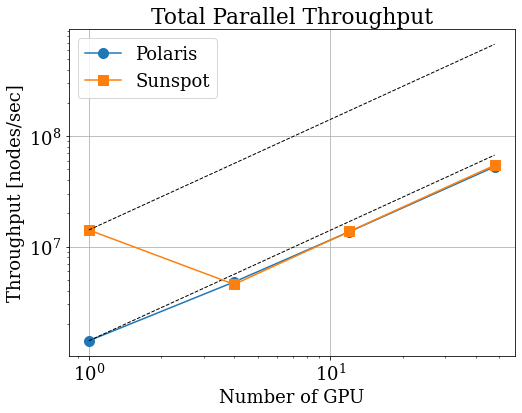

In [30]:
# Average parallel training throughput

gpu_list = [1, 4, 12, 48]
polaris_serial = polaris_large.train_fom['throughput_par'][0]
polaris_ideal = [gpu_list[i]*polaris_serial for i in range(len(gpu_list))]
sunspot_serial = sunspot_large.train_fom['throughput_par'][0]
sunspot_ideal = [gpu_list[i]*sunspot_serial for i in range(len(gpu_list))]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axs.plot(gpu_list, polaris_large.train_fom['throughput_par'],label = "Polaris",marker="o",ls="-",markersize=10)
axs.plot(gpu_list, polaris_ideal,c="k",ls="--",linewidth=1)
axs.plot(gpu_list, sunspot_large.train_fom['throughput_par'],label = "Sunspot",marker="s",ls="-",markersize=10)
axs.plot(gpu_list, sunspot_ideal,c="k",ls="--",linewidth=1)

axs.set_xscale("log")
axs.grid()
axs.set_xlabel('Number of GPU')
axs.set_yscale("log")
#fig.legend(bbox_to_anchor=(1.25,0.7))
axs.legend(loc='upper left')
#axs[0].set_ylim(0.8, 150)
axs.set_ylabel('Throughput [nodes/sec]')
#axs[1].set_ylabel('Time [node-hours]')
axs.set_title('Total Parallel Throughput')
#axs[1].set_title('Total Workflow Computational Time')
#fig.tight_layout(pad=3.0)

Text(0.5, 1.0, 'Total Parallel Throughput')

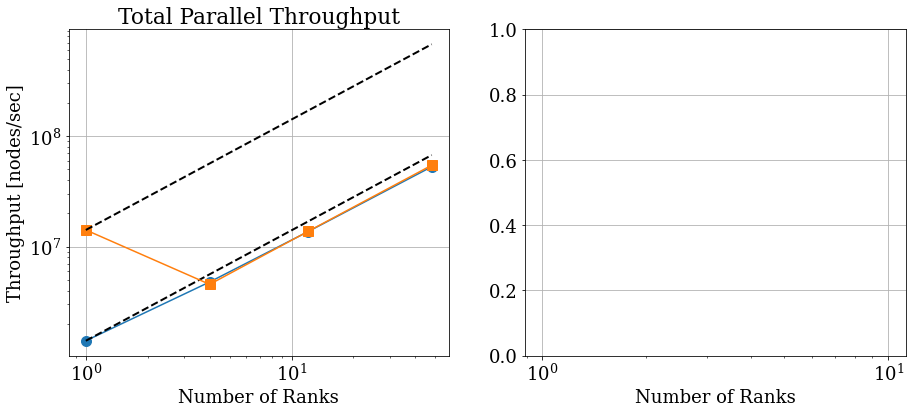

In [25]:
# Average parallel training throughput

gpu_list = [1, 4, 12, 48]
polaris_serial = polaris_large.train_fom['throughput_par'][0]
polaris_ideal = [gpu_list[i]*polaris_serial for i in range(len(gpu_list))]
sunspot_serial = sunspot_large.train_fom['throughput_par'][0]
sunspot_ideal = [gpu_list[i]*sunspot_serial for i in range(len(gpu_list))]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axs[0].plot(gpu_list, polaris_large.train_fom['throughput_par'],label = "Polaris",marker="o",ls="-",markersize=10)
axs[0].plot(gpu_list, polaris_ideal,c="k",ls="--",linewidth=2)
axs[0].plot(gpu_list, sunspot_large.train_fom['throughput_par'],label = "Sunspot",marker="s",ls="-",markersize=10)
axs[0].plot(gpu_list, sunspot_ideal,c="k",ls="--",linewidth=2)



for i in range(2):
    axs[i].set_xscale("log")
    axs[i].grid()
    axs[i].set_xlabel('Number of GPU')
axs[0].set_yscale("log")
#fig.legend(bbox_to_anchor=(1.25,0.7))
#axs[0].legend(loc='lower center')
#axs[0].set_ylim(0.8, 150)
axs[0].set_ylabel('Throughput [nodes/sec]')
#axs[1].set_ylabel('Time [node-hours]')
axs[0].set_title('Total Parallel Throughput')
#axs[1].set_title('Total Workflow Computational Time')
#fig.tight_layout(pad=3.0)